In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
data.drop(['show_id'], axis=1, inplace=True)

In [8]:
data.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
data.shape

(8790, 9)

In [10]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [11]:
data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [12]:
data['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [13]:
data['listed_in'].value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

In [14]:
data['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [15]:
country = data.groupby(['country','type'])['type'].count().sort_values().reset_index(name='count')
country

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,350
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,976


In [16]:
listed = data.groupby(['country','listed_in'])['listed_in'].count().sort_values().reset_index(name='count')
listed

,country,listed_in,count
0,Argentina,"Action & Adventure, Comedies, International Mo...",1
1,Pakistan,"Anime Series, International TV Shows, TV Thril...",1
2,Pakistan,"Anime Series, International TV Shows, Romantic...",1
3,Pakistan,"Anime Series, Crime TV Shows, International TV...",1
4,Pakistan,"Anime Features, Documentaries",1
...,...,...,...
2015,United States,"Children & Family Movies, Comedies",122
2016,India,"Dramas, International Movies",122
2017,India,"Comedies, Dramas, International Movies",124
2018,United States,Stand-Up Comedy,216


In [34]:
Type = data['type'].value_counts()
Type

Movie      6126
TV Show    2664
Name: type, dtype: int64

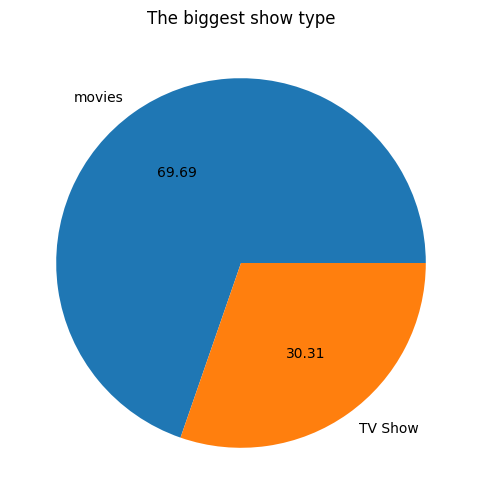

In [18]:
plt.figure(figsize=(8,6))
plt.title('The biggest show type')
plt.pie(data['type'].value_counts(), autopct = '%.2f', labels = ['movies','TV Show'])
plt.show()

In [19]:
Rating = data['rating'].unique()

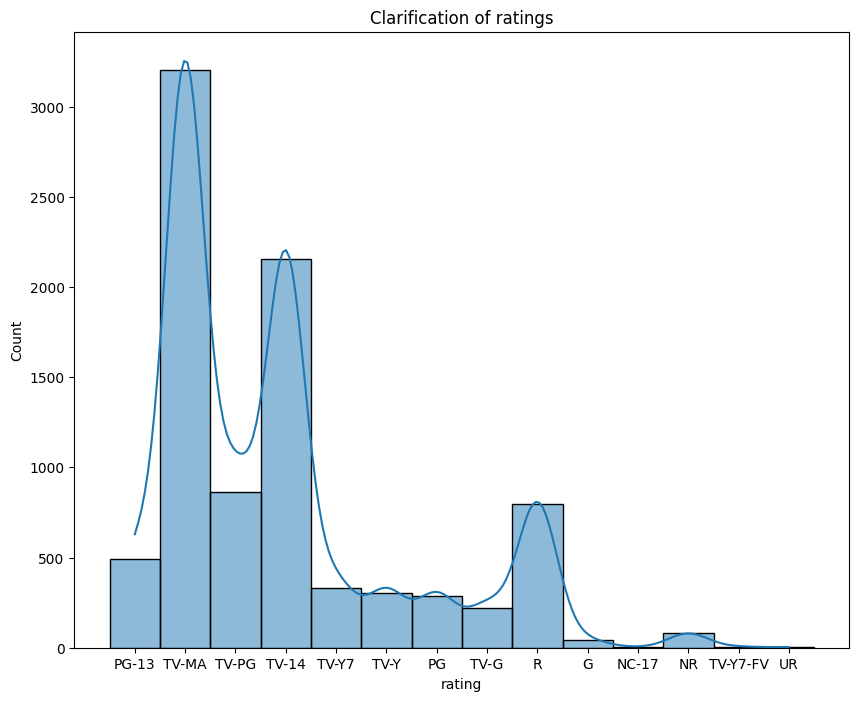

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(data['rating'], kde=True)
plt.title('Clarification of ratings')
plt.show()

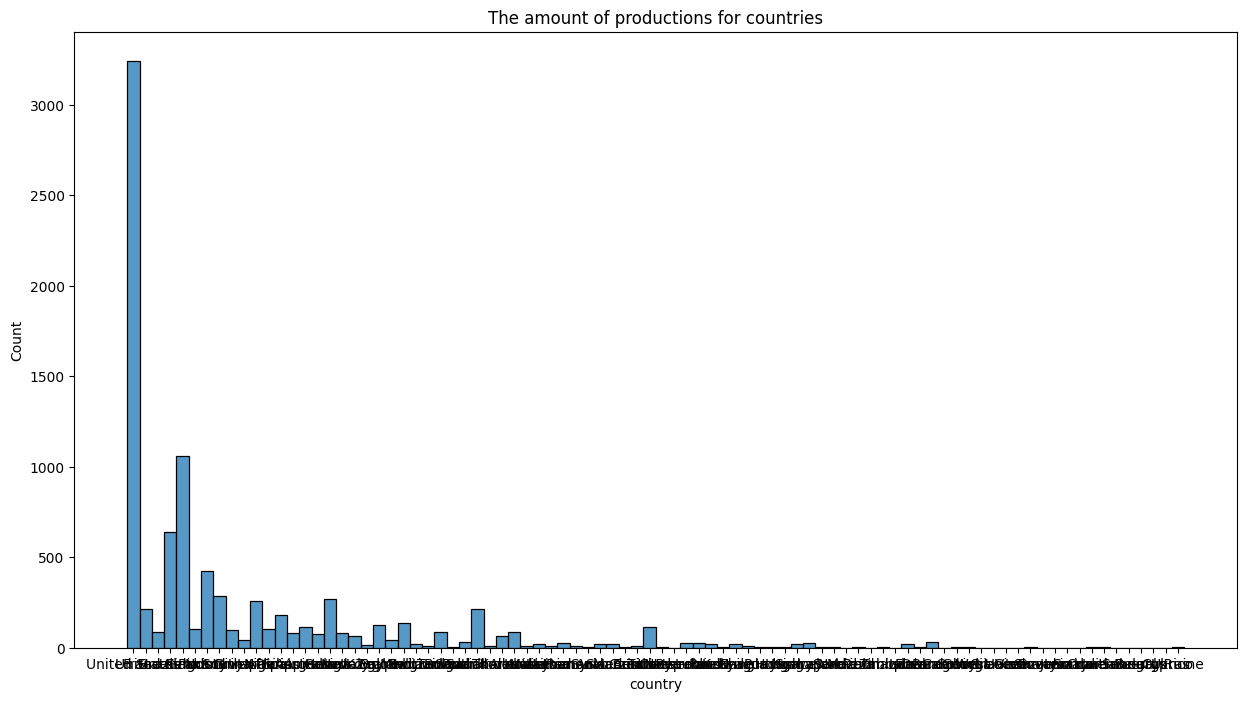

In [50]:
plt.figure(figsize=(15,8))
plt.title('The amount of productions for countries')
sns.histplot(data['country'])
plt.show()

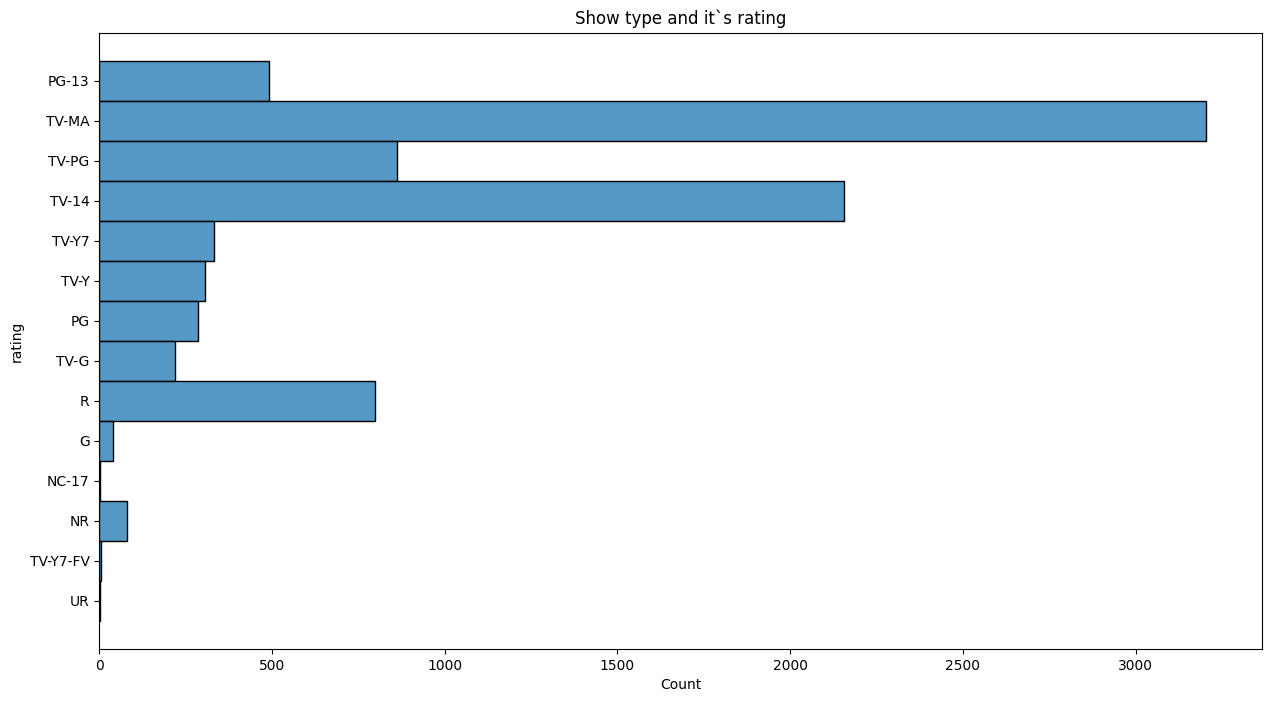

In [58]:
plt.figure(figsize=(15,8))
plt.title('Show type and it`s rating')
sns.histplot(data['type'], y=data['rating'])
plt.show()

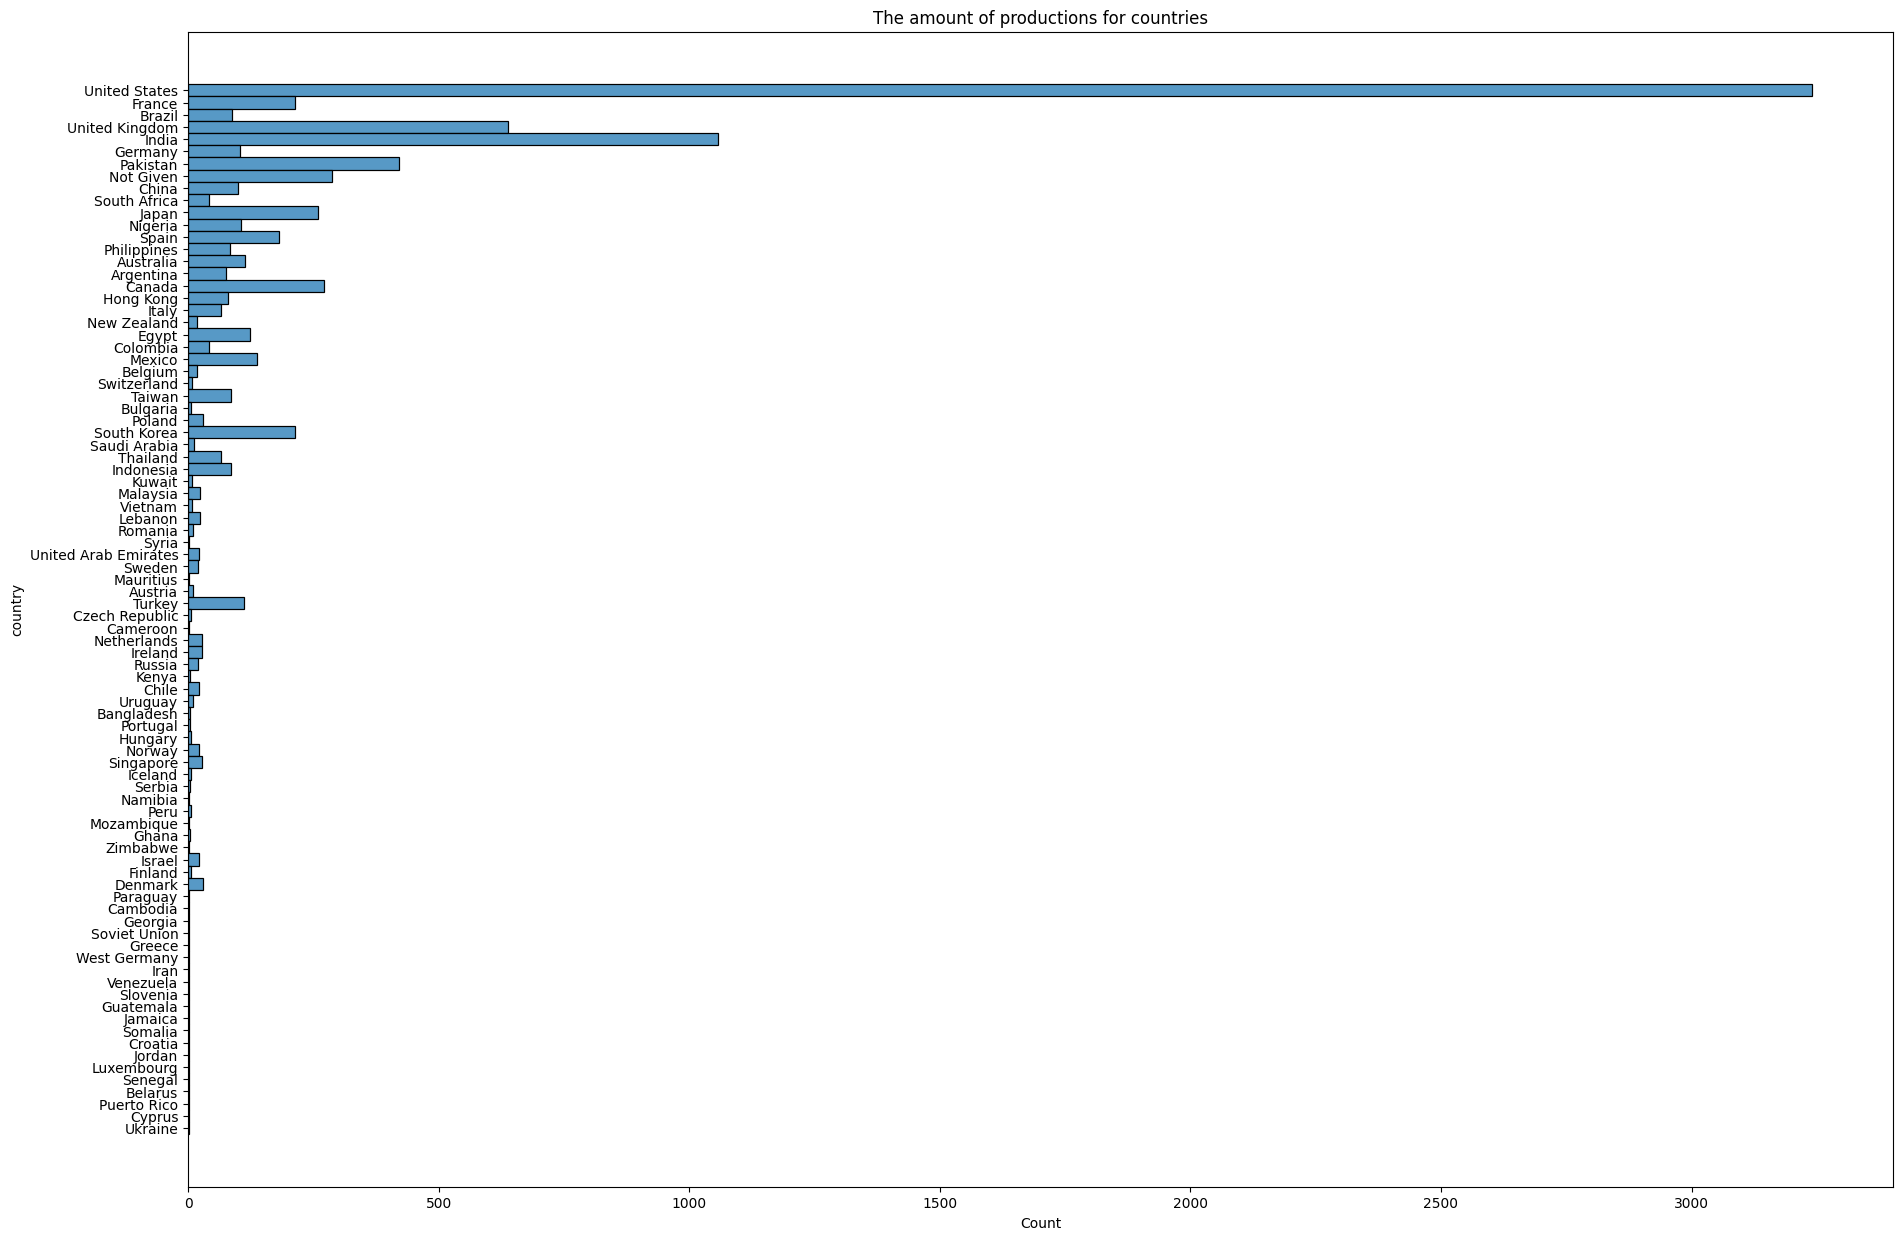

In [62]:
plt.figure(figsize=(22,15))
plt.title('The amount of productions for countries')
sns.histplot(data['rating'], y=data['country'])
plt.show()

In [64]:
top_10_rating = data['listed_in'].value_counts().head(10)

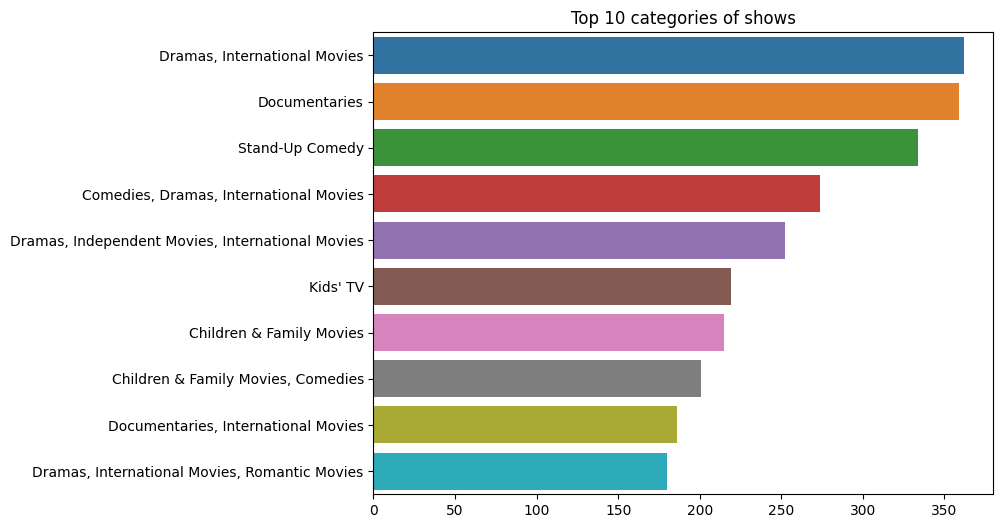

In [77]:
plt.figure(figsize=(8,6))
plt.title('Top 10 categories of shows')
sns.barplot(x=top_10_rating.values, y=top_10_rating.index)
plt.show()

In [84]:
top_10_director = data['director'].value_counts().drop("Not Given").head(10)

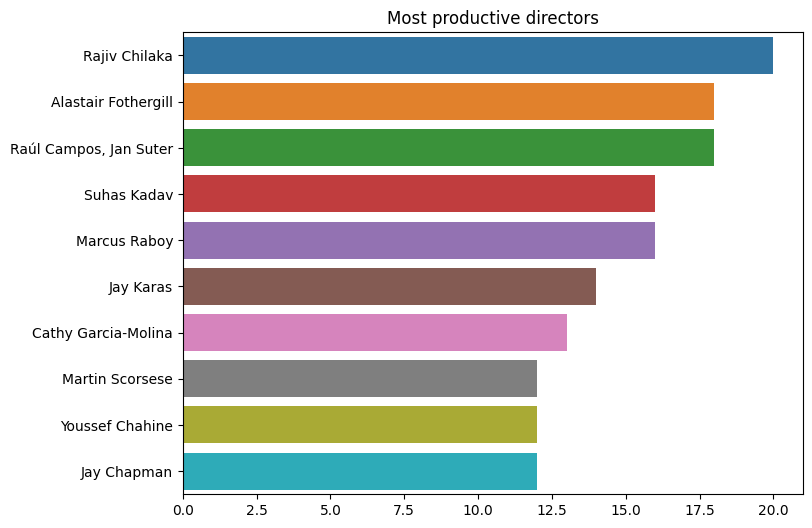

In [85]:
plt.figure(figsize=(8,6))
plt.title('Most productive directors')
sns.barplot(x=top_10_director.values, y=top_10_director.index)
plt.show()

In [88]:
top_10_years = data['release_year'].value_counts().head(10)

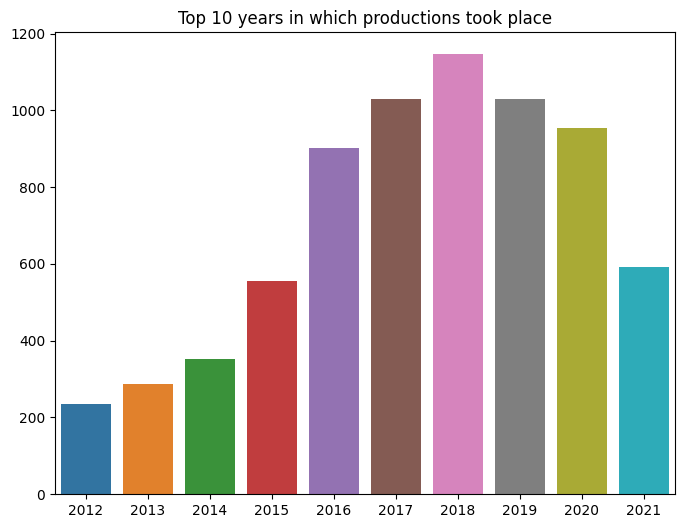

In [90]:
plt.figure(figsize=(8,6))
plt.title('Top 10 years in which productions took place')
sns.barplot(x=top_10_years.index, y=top_10_years.values)
plt.show()

In [93]:
top_10_duration = data['duration'].value_counts().head(10)

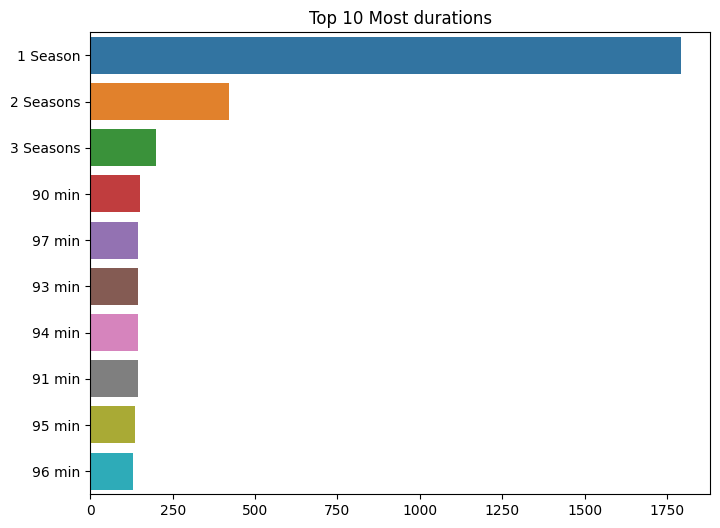

In [96]:
plt.figure(figsize=(8,6))
plt.title('Top 10 Most durations')
sns.barplot(x=top_10_duration.values, y=top_10_duration.index)
plt.show()